In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The `pyopendemic` package must be installed in the local environment.

The `data` submodule provides a standardized interface for data in different countries/counties/regions.

In [2]:
import opendemic.data as odd

## State-level data

In [3]:
state = 'NY'

In [4]:
ny_data = odd.USARegionData.fetch(state=state)

In [5]:
ny_data

Region: New York, NY.
N. data points: 52.
Dates from 2020-03-04 00:00:00 to 2020-04-24 00:00:00.
Cases at 2020-04-24 00:00:00: 271590.0.

It is possible to get the dataset as 1d `numpy.ndarray`s or as pandas dataframes.

In [6]:
type(ny_data.dates), type(ny_data.cases)

(numpy.ndarray, numpy.ndarray)

In [7]:
ny_data.dates[-5:]

array([datetime.datetime(2020, 4, 20, 0, 0),
       datetime.datetime(2020, 4, 21, 0, 0),
       datetime.datetime(2020, 4, 22, 0, 0),
       datetime.datetime(2020, 4, 23, 0, 0),
       datetime.datetime(2020, 4, 24, 0, 0)], dtype=object)

In [8]:
ny_data.cases[-5:]

array([247512., 251690., 257216., 263460., 271590.], dtype=float32)

In [9]:
df = ny_data.asdf # AS DataFrame
df.tail(5)

,cases,new_cases
2020-04-20,247512.0,6345.196289
2020-04-21,251690.0,6200.889648
2020-04-22,257216.0,6167.982422
2020-04-23,263460.0,6199.121094
2020-04-24,271590.0,6234.916504


As you noticed, in the dataframe there is a column named `new_cases` which has non-integer values. These values represent the time series of the number of new cases for each day smoothed with a gaussian kernel. To get the raw increment of the number of cases one can compute
``np.diff(RegionData.cases)``.

In [10]:
print('smoothed: ', ny_data.new_cases[-5:])
print('raw: ', np.diff(ny_data.cases)[-5:])

smoothed:  [6345.1963 6200.8896 6167.9824 6199.121  6234.9165]
raw:  [4726. 4178. 5526. 6244. 8130.]


The following plot shows that the cumulative sum of the smoothed time series of the number of new cases gives a result which is very close to the one of the raw number of total cases in each day.

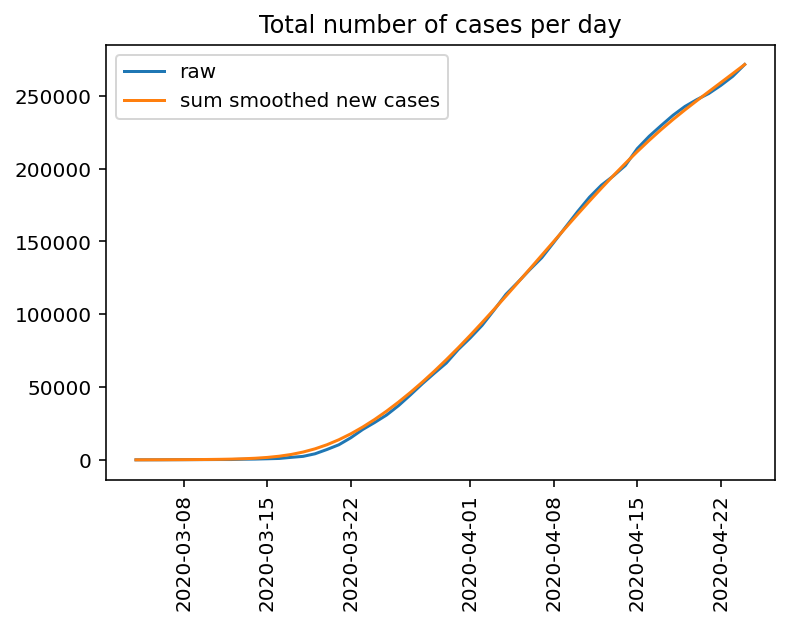

In [11]:
plt.plot(ny_data.dates, ny_data.cases, label='raw')
plt.plot(ny_data.dates, np.cumsum(ny_data.new_cases), label='sum smoothed new cases')
plt.title('Total number of cases per day')
plt.xticks(rotation=90)
plt.legend()

## County-level data
While state-level data are fetched from the [COVID tracking project](https://covidtracking.com/api), the county-level data are fetched from the [NYT github repository](https://github.com/nytimes/covid-19-data). the NYT dataset is updated many times during the day, hence the sampling is less consistent with respect to the one of the _COVID tracking project_ which is updated once every day, but has higher spatial resolution. Here an example for a single county.

In [12]:
fips = 36103 # Suffolk county, NY

In [13]:
county_data = odd.USARegionData.fetch(county=fips)
county_data

Region: Suffolk County, NY, 36103.
N. data points: 45.
Dates from 2020-03-10 00:00:00 to 2020-04-23 00:00:00.
Cases at 2020-04-23 00:00:00: 29567.0.

In [14]:
county_data.asdf.tail(5)

,cases,new_cases
2020-04-19,26888.0,794.859497
2020-04-20,27662.0,764.955688
2020-04-21,28154.0,737.982361
2020-04-22,28854.0,717.717407
2020-04-23,29567.0,706.930481


#### What if I specify a county in the wrong state?
I'll try to fetch data for the fips above, which is in the state of NY, and specify Alaska as the state to fetch. If a county is specified, it will ignore the given state.

>Despite existing several cases of homonymy among counties in the US, using the FIPS code bypasses this problem.

In [15]:
lets_see = odd.USARegionData.fetch(state='AK', county=fips)
lets_see

Region: Suffolk County, NY, 36103.
N. data points: 45.
Dates from 2020-03-10 00:00:00 to 2020-04-23 00:00:00.
Cases at 2020-04-23 00:00:00: 29567.0.